In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import random

from helpers import get_dataset, is_sorted, swap
from middlewares import AnimationMiddleware, GroupOfMiddlewares

# insertion sort
https://en.wikipedia.org/wiki/Insertion_sort
- complexity $O(N^{2})$

pseudocode
```
i ← 1
while i < length(A)
    j ← i
    while j > 0 and A[j-1] > A[j]
        swap A[j] and A[j-1]
        j ← j - 1
    end while
    i ← i + 1
end while
```

In [3]:
def insertion_sort_straightway(data):
    # because we mutate list we are going to clone input list
    data = data[:]
    
    i = 1
    while i < len(data):
        j = i
        while j > 0 and data[j-1] > data[j]:
            swap(data, j, j-1)
            j = j - 1
        i = i + 1
    return data

random.seed('sorting')
data = get_dataset()

res = insertion_sort_straightway(data)
assert res is not data
assert is_sorted(res)

print('passed:')
print(data)
print()
print('result:')
print(res)

passed:
[24, 64, 47, 8, 48, 54, 86, 93, 98, 8, 70, 27, 46, 11, 58, 55, 58, 82, 56, 89, 70, 46, 10, 77, 5, 1, 1, 90, 33, 45, 91, 32, 6, 31, 61, 89, 89, 58, 61, 84, 56, 28, 92, 19, 69, 68, 63, 51, 93, 34, 95, 67, 81, 80, 55, 15, 64, 64, 100, 21, 74, 41, 90, 52, 25, 38, 59, 46, 65, 67, 41, 5, 16, 20, 6, 22, 75, 28, 28, 85, 53, 46, 88, 86, 89, 50, 25, 58, 10, 64, 53, 78, 82, 16, 83, 58, 86, 65, 77, 4, 92, 61, 69, 49, 36, 85, 83, 61, 17, 37, 29, 53, 20, 87, 20, 67, 83, 8, 57, 51, 37, 58, 24, 41, 55, 24, 98, 8]

result:
[1, 1, 4, 5, 5, 6, 6, 8, 8, 8, 8, 10, 10, 11, 15, 16, 16, 17, 19, 20, 20, 20, 21, 22, 24, 24, 24, 25, 25, 27, 28, 28, 28, 29, 31, 32, 33, 34, 36, 37, 37, 38, 41, 41, 41, 45, 46, 46, 46, 46, 47, 48, 49, 50, 51, 51, 52, 53, 53, 53, 54, 55, 55, 55, 56, 56, 57, 58, 58, 58, 58, 58, 58, 59, 61, 61, 61, 61, 63, 64, 64, 64, 64, 65, 65, 67, 67, 67, 68, 69, 69, 70, 70, 74, 75, 77, 77, 78, 80, 81, 82, 82, 83, 83, 83, 84, 85, 85, 86, 86, 86, 87, 88, 89, 89, 89, 89, 90, 90, 91, 92, 92, 93

passed:
[24, 64, 47, 8, 48, 54, 86, 93, 98, 8, 70, 27, 46, 11, 58, 55, 58, 82, 56, 89, 70, 46, 10, 77, 5, 1, 1, 90, 33, 45, 91, 32, 6, 31, 61, 89, 89, 58, 61, 84, 56, 28, 92, 19, 69, 68, 63, 51, 93, 34, 95, 67, 81, 80, 55, 15, 64, 64, 100, 21, 74, 41, 90, 52, 25, 38, 59, 46, 65, 67, 41, 5, 16, 20, 6, 22, 75, 28, 28, 85, 53, 46, 88, 86, 89, 50, 25, 58, 10, 64, 53, 78, 82, 16, 83, 58, 86, 65, 77, 4, 92, 61, 69, 49, 36, 85, 83, 61, 17, 37, 29, 53, 20, 87, 20, 67, 83, 8, 57, 51, 37, 58, 24, 41, 55, 24, 98, 8]

result:
[1, 1, 4, 5, 5, 6, 6, 8, 8, 8, 8, 10, 10, 11, 15, 16, 16, 17, 19, 20, 20, 20, 21, 22, 24, 24, 24, 25, 25, 27, 28, 28, 28, 29, 31, 32, 33, 34, 36, 37, 37, 38, 41, 41, 41, 45, 46, 46, 46, 46, 47, 48, 49, 50, 51, 51, 52, 53, 53, 53, 54, 55, 55, 55, 56, 56, 57, 58, 58, 58, 58, 58, 58, 59, 61, 61, 61, 61, 63, 64, 64, 64, 64, 65, 65, 67, 67, 67, 68, 69, 69, 70, 70, 74, 75, 77, 77, 78, 80, 81, 82, 82, 83, 83, 83, 84, 85, 85, 86, 86, 86, 87, 88, 89, 89, 89, 89, 90, 90, 91, 92, 92, 93

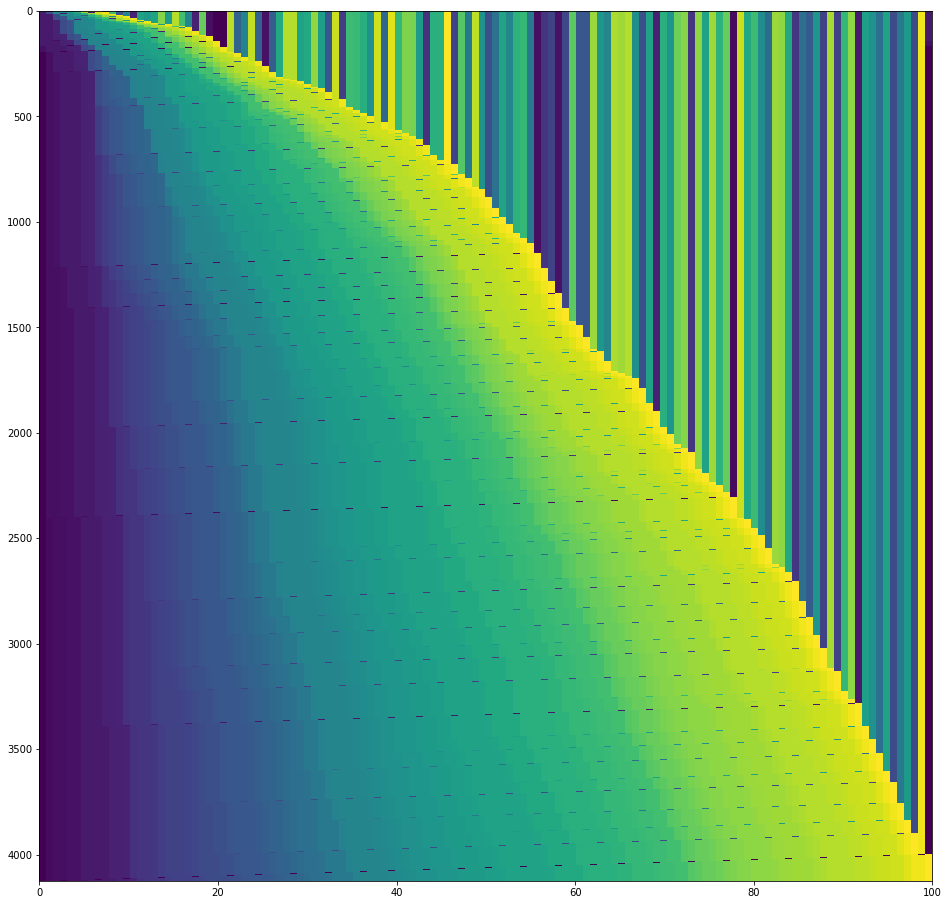

In [4]:
def insertion_sort_pythonic(data, middlewares):
    # because we mutate list we are going to clone input list
    data = data[:]
    
    for i in range(1, len(data)):
        for j in reversed(range(i + 1)):
            if data[j-1] <= data[j]:
                break
            swap(data, j, j-1)
            middlewares.process(data)

    return data


animation = AnimationMiddleware()
middlewares = GroupOfMiddlewares([
    animation,
])

res = insertion_sort_pythonic(data, middlewares)

print('passed:')
print(data)
print()
print('result:')
print(res)

assert res is not data
assert is_sorted(res)

plt.figure(figsize=(16,16))
plt.imshow(animation.animation, interpolation='none', aspect='auto', extent=[0,100, len(animation.animation), 0]);